In [0]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
cd '/content/drive/My Drive/CSCE_689'

/content/drive/.shortcut-targets-by-id/188Eba_cLfN68Gy_4d0czpAJtiCmTs8jW/CSCE_689


In [0]:
!ls 

 0.avi	   67.avi				      Features_final7-10.csv
 100.avi   68.avi				      Features_final.csv
 10.avi    69.avi				     'First submission'
 11.avi    6.avi				      KNN.sav
 12.avi    70.avi				      Labels40_69.csv
 13.avi    71.avi				      Labels40.csv
 14.avi    72.avi				      Labels70-73.csv
 15.avi    73.avi				      Labels7-10.csv
 16.avi    74.avi				      Labels_final.csv
 17.avi    75.avi				      labels.npy
 18.avi    76.avi				      LR.sav
 19.avi    77.avi				      MLP.sav
 1.avi	   78.avi				      model1.h5
 20.avi    79.avi				      model.h5
 21.avi    7.avi				      model.json
 22.avi    80.avi				      model.png
 23.avi    81.avi				      NN_test.npy
 24.avi    82.avi				      NN_train.npy
 25.avi    83.avi				      optimization
 26.avi    84.avi				      Prediction
 27.avi    85.avi				      Prediction_train
 28.avi    86.avi				     'Pred_label (1).npy'
 29.avi    87.avi				      Pred_label.npy
 2.avi	   88.avi				      README.md
 30.avi    89.avi				      RF.sav
 

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
import joblib
import math


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# These are dumped by model.ipython
X_train=np.load("x_train.npy")
y_train=np.load("y_train.npy")
X_test=np.load("x_test.npy")
y_test=np.load("y_test.npy")
X=np.append(X_train,X_test,axis=0)
Y=np.append(y_train,y_test,axis=0)

In [0]:
X_test.shape

(2952, 10)

## 1. Logistic Regression

In [0]:
clf = LogisticRegression(max_iter=500).fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)
y_score_1 = clf.predict_proba(X_test)[:,1]
y_LR=clf.predict_proba(X_train)[:,1]
acc1 = accuracy_score(y_test, y_pred_1)
f1_score_1 = metrics.f1_score(y_test, y_pred_1)
roc_1 = metrics.roc_auc_score(y_test, y_score_1)
print([acc1,f1_score_1,roc_1])
print(confusion_matrix(y_test, y_pred_1))
# save the model to disk
joblib.dump(clf, 'LR.sav')

[0.8143631436314364, 0.03859649122807018, 0.5116860378641396]
[[2393   84]
 [ 464   11]]


['LR.sav']

## 2. Naive Bayes

In [0]:
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
pred_NB = clf_NB.predict(X_test)
y_score_2 = clf_NB.predict_proba(X_test)[:,1]
y_NB=clf_NB.predict_proba(X_train)[:,1]
acc2 = accuracy_score(y_test, pred_NB)
f1_score_2 = metrics.f1_score(y_test, pred_NB)
roc_2 = metrics.roc_auc_score(y_test, y_score_2)
print([acc2,f1_score_2,roc_2])
print(confusion_matrix(y_test, pred_NB))
# save the model to disk
joblib.dump(clf_NB, 'clf_NB.sav')

[0.7157859078590786, 0.31844029244516653, 0.6351188831991161]
[[1917  560]
 [ 279  196]]


['clf_NB.sav']

## 3. KNN

In [0]:
acc3_list = []
f1_score3_list = []
roc_3_list = []
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train) 
    pred_KN = neigh.predict(X_test)
    y_score_3 = neigh.predict_proba(X_test)[:,1]
    acc3_list.append(accuracy_score(y_test, pred_KN))
    f1_score3_list.append(metrics.f1_score(y_test, pred_KN))
    roc_3_list.append(metrics.roc_auc_score(y_test, y_score_3))


In [0]:
acc3_list.index(max(acc3_list))+1

28

In [0]:
neigh = KNeighborsClassifier(n_neighbors=acc3_list.index(max(acc3_list))+1)
neigh.fit(X_train, y_train) 
pred_KN = neigh.predict(X_test)
y_score_3 = neigh.predict_proba(X_test)[:,1]
y_KNN=neigh.predict_proba(X_train)[:,1]
acc3 = accuracy_score(y_test, pred_KN)
f1_score_3 = metrics.f1_score(y_test, pred_KN)
roc_3 = metrics.roc_auc_score(y_test, y_score_3)
print([acc3,f1_score_3,roc_3])
print(confusion_matrix(y_test, pred_KN))
# save the model to disk
joblib.dump(neigh, 'KNN.sav')

[0.8177506775067751, 0.3224181360201511, 0.6733450906232072]
[[2286  191]
 [ 347  128]]


['KNN.sav']

## 4. MLP

In [0]:
from sklearn.neural_network import MLPClassifier
F1_score_4_list = []
acc4_list = []
roc_4_list = []
mlp = []

hidden_units = [10,20,30,40,50,60,70]
optimizer ='lbfgs'
activation = ['logistic','tanh','relu']
for j in activation:
    for k in hidden_units:
      clf_MLP = MLPClassifier(hidden_layer_sizes= k, activation =  j, solver=optimizer,max_iter=2000)
      clf_MLP.fit(X_train, y_train)
      pred_MLP = clf_MLP.predict(X_test)
      y_score_4 = clf_MLP.predict_proba(X_test)[:,1]
      acc4_list.append(accuracy_score(y_test,pred_MLP))
      roc_4_list.append(metrics.roc_auc_score(y_test, y_score_4))
      F1_score_4_list.append(metrics.f1_score(y_test, pred_MLP))
      mlp.append([j,k])

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [0]:
print("Best Accuracy: ", max(acc4_list))
min_index = acc4_list.index(max(acc4_list))
print("Best Combination:", mlp[min_index])

Best Accuracy:  0.8204607046070461
Best Combination: ['relu', 10]


In [0]:
clf_MLP = MLPClassifier(hidden_layer_sizes= mlp[min_index][1], activation =  mlp[min_index][0], solver= optimizer)
clf_MLP.fit(X_train, y_train)
pred_MLP = clf_MLP.predict(X_test)
y_score_4 = clf_MLP.predict_proba(X_test)[:,1]
y_MLP=clf_MLP.predict_proba(X_train)[:,1]
acc4 = accuracy_score(y_test,pred_MLP)
f1_score_4 = metrics.f1_score(y_test, pred_MLP)
roc_4 = metrics.roc_auc_score(y_test, y_score_4)
print([acc4,f1_score_4,roc_4])
print(confusion_matrix(y_test, pred_MLP))
# save the model to disk
joblib.dump(clf_MLP, 'MLP.sav')

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.8340108401084011, 0.4406392694063927, 0.7346841467819731]
[[2269  208]
 [ 282  193]]


['MLP.sav']

## 5. SVM

In [0]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Set the parameters by cross-validation
clf_SVM=svm.SVC(kernel='rbf',probability=True)
clf_SVM.fit(X_train, y_train)
y_true,pred_SVM=y_test,clf_SVM.predict(X_test)
y_score_5 = clf_SVM.predict_proba(X_test)[:,1]
y_SVM=clf_SVM.predict_proba(X_train)[:,1]
acc5 = accuracy_score(y_test,pred_SVM)
f1_score_5 = metrics.f1_score(y_test, pred_SVM)
roc_5 = metrics.roc_auc_score(y_test, y_score_5)
print([acc5,f1_score_5,roc_5])
print(confusion_matrix(y_test, pred_SVM))
# save the model to disk
joblib.dump(clf_SVM, 'SVM.sav')

[0.8556910569105691, 0.32165605095541405, 0.737131079616684]
[[2425   52]
 [ 374  101]]


['SVM.sav']

## 6. Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
acc6=[]
max_depth = []
for i in range(1,10):
    clf_RF = RandomForestClassifier(max_depth=i)
    clf_RF.fit(X_train, y_train) 
    pred_RF = clf_RF.predict(X_test)
    acc6.append(accuracy_score(pred_RF, y_test))
    max_depth.append(i)
print (max(acc6))

0.8516260162601627


In [0]:
best_depth_6 = max_depth[acc6.index(max(acc6))]

In [0]:
best_depth_6

3

In [0]:
clf_RF = RandomForestClassifier(max_depth=best_depth_6)
clf_RF.fit(X_train, y_train) 
pred_RF = clf_RF.predict(X_test)
y_score_6 = clf_RF.predict_proba(X_test)[:,1]
y_RF=clf_RF.predict_proba(X_train)[:,1]
acc6 = accuracy_score(y_test, pred_RF)
f1_score_6 = metrics.f1_score(y_test, pred_RF)
roc_6 = metrics.roc_auc_score(y_test, y_score_6)
print([acc6,f1_score_6,roc_6])
print(confusion_matrix(y_test, pred_RF))
# save the model to disk
joblib.dump(clf_RF, 'RF.sav')

[0.850609756097561, 0.15028901734104047, 0.6745094872830036]
[[2472    5]
 [ 436   39]]


['RF.sav']

## 7. AdaBoost

In [0]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", max_depth = None)

clf_ADB = AdaBoostClassifier(base_estimator = DTC)

# run grid search
clf_ABC = GridSearchCV(clf_ADB, param_grid=param_grid, scoring = 'f1')
clf_ABC.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf_ABC.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf_ABC.cv_results_['mean_test_score']
stds = clf_ABC.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_ABC.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, pred_ABC = y_test, clf_ABC.predict(X_test)
print()
y_score_7 = clf_ABC.predict_proba(X_test)[:,1]
y_ABC=clf_ABC.predict_proba(X_train)[:,1]
acc7 = accuracy_score(y_test,pred_ABC)
f1_score_7 = metrics.f1_score(y_test, pred_ABC)
roc_7 = metrics.roc_auc_score(y_test, y_score_7)
print([acc7,f1_score_7,roc_7])
print(confusion_matrix(y_test, pred_ABC))
# save the model to disk
joblib.dump(clf_ABC, 'ABC.sav')

Best parameters set found on development set:

{'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'random', 'n_estimators': 1}

Grid scores on development set:

0.305 (+/-0.117) for {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 1}
0.244 (+/-0.197) for {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 2}
0.307 (+/-0.106) for {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'random', 'n_estimators': 1}
0.238 (+/-0.181) for {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'random', 'n_estimators': 2}
0.299 (+/-0.137) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 1}
0.252 (+/-0.196) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 2}
0.297 (+/-0.098) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'n_estimators': 1}
0.236 (+/-0

['ABC.sav']

## 8. XGBoost

In [0]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'clf__max_depth': range(3, 10),
    'clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'clf__gamma': [i/10.0 for i in range(3)],
  }
]

scoring = 'f1'
clf_XGB= GridSearchCV(
  XGBClassifier(objective='binary:logistic'),
  param_grid=search_space,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)
clf_XGB.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf_XGB.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf_XGB.cv_results_['mean_test_score']
stds = clf_XGB.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_XGB.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, pred_XGB = y_test, clf_XGB.predict(X_test)
print()

y_score_8 = clf_XGB.predict_proba(X_test)[:,1]
y_XGB=clf_XGB.predict_proba(X_train)[:,1]
acc8 = accuracy_score(y_test,pred_XGB)
f1_score_8 = metrics.f1_score(y_test, pred_XGB)
roc_8 = metrics.roc_auc_score(y_test, y_score_8)
print([acc8,f1_score_8,roc_8])
print(confusion_matrix(y_test, pred_XGB))
# save the model to disk
joblib.dump(clf_XGB, 'XGB.sav')

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 57.5min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 78.3min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 102.2min
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed: 107.5min finished


Best parameters set found on development set:

{'clf__colsample_bytree': 0.1, 'clf__gamma': 0.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 50}

Grid scores on development set:

0.227 (+/-0.199) for {'clf__colsample_bytree': 0.1, 'clf__gamma': 0.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 50}
0.227 (+/-0.199) for {'clf__colsample_bytree': 0.1, 'clf__gamma': 0.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 100}
0.227 (+/-0.199) for {'clf__colsample_bytree': 0.1, 'clf__gamma': 0.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 150}
0.227 (+/-0.199) for {'clf__colsample_bytree': 0.1, 'clf__gamma': 0.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 200}
0.227 (+/-0.199) for {'clf__colsample_bytree': 0.1, 'clf__gamma': 0.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 4, 'clf__n_estimators': 50}
0.227 (+/-0.199) for {'clf__colsample_bytree': 0.1, 'clf__gamma': 0

['XGB.sav']

## Transfer learning

In [0]:
from tensorflow.keras.models import load_model
loaded_model=load_model('vgg16_2.h5')
vgg_19=load_model('vgg19_2.h5')
rsn=load_model("rsn.h5")

In [0]:
def getFrame(sec):
    start = 0
    vidcap.set(cv2.CAP_PROP_POS_MSEC, start + sec*1000)
    hasFrames,image = vidcap.read()
    return hasFrames, image

In [0]:
# Get prediction probabilites from 100 videos for all 3 transfer learning models
import cv2
j=0
c_a=100000
c_b=0
y_tl=[]
y_vgg19=[]
y_rsn=[]
tl_vid=[]
tl_time=[]
for i in range(101):
    vidcap = cv2.VideoCapture(str(i) + '.avi')
    print(i)
    sec = 0
    frameRate = 0.05
    success, image = getFrame(sec)
    count = 0
    while success and count <= int(vidcap.get(cv2.CAP_PROP_POS_FRAMES)):
        c_a=c_a+1
        resized_image = cv2.resize(image, (224, 224))
        img = np.asarray(resized_image)
        img = np.expand_dims(img, axis=0)
        output = loaded_model.predict(img)
        output_2=vgg_19.predict(img)
        output_3=rsn.predict(img)
        y_tl.append(output[0][1])
        y_vgg19.append(output_2[0][1])
        y_rsn.append(output_3[0][1])
        tl_time.append(sec)
        tl_vid.append(i)

        
        sec = sec + frameRate
        sec = round(sec, 3)

        success, image = getFrame(sec)
        j=j+1
        count+=1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [0]:
#Save Labels
tl_df=pd.DataFrame()
tl_df["vid"]=tl_vid
tl_df["time"]=tl_time
tl_df["prob"]=y_tl
tl_df['vgg19']=y_vgg19
tl_df['rsn']=y_rsn
tl_df.to_csv("tl_df.csv")

In [0]:
tl_df=pd.read_csv("tl_df.csv")
y_tl=tl_df["prob"]
y_vgg19=tl_df['vgg19']
y_rsn=tl_df['rsn']

In [0]:
labels=pd.read_csv('combinedlabels.csv')
labels=labels.drop(["Unnamed: 0"],axis=1)

In [0]:
labels['combine']=labels['label'].apply(str) +" "+ labels['timestamp'].apply(str)
labels.head()

,label,timestamp,combine
0,0,0.00,0 0.0
1,0,0.05,0 0.05
2,0,0.10,0 0.1
3,0,0.15,0 0.15
4,0,0.20,0 0.2


In [0]:
tl_df['combine']=tl_df['vid'].apply(str) +" "+ tl_df['time'].apply(str)
tl_df.head()

,Unnamed: 0,vid,time,prob,vgg19,rsn,combine
0,0,0,0.00,0.013767,0.100489,0.452270,0 0.0
1,1,0,0.05,0.009074,0.095695,0.452270,0 0.05
2,2,0,0.10,0.010521,0.090801,0.452271,0 0.1
3,3,0,0.15,0.009306,0.099288,0.452270,0 0.15
4,4,0,0.20,0.010060,0.103899,0.452270,0 0.2


In [0]:
y_NN= np.load("NN_train.npy")
y_N2=np.load("NN_test.npy")
y_NN=np.append(y_NN,y_N2)

In [0]:
LR=joblib.load("LR.sav")
NB=joblib.load("clf_NB.sav")
KNN=joblib.load("KNN.sav")
MLP=joblib.load("MLP.sav")
SVM=joblib.load("SVM.sav")
RF=joblib.load("RF.sav")
ABC=joblib.load("ABC.sav")
XGB=joblib.load("XGB.sav")

In [0]:
df=pd.DataFrame()
df['LR']=LR.predict_proba(X)[:,1]
df['NB']=NB.predict_proba(X)[:,1]
df['KNN']=KNN.predict_proba(X)[:,1]
df['MLP']=MLP.predict_proba(X)[:,1]
df['SVM']=SVM.predict_proba(X)[:,1]
df['RF']=RF.predict_proba(X)[:,1]
df['ABC']=ABC.predict_proba(X)[:,1]
df['XGB']=XGB.predict_proba(X)[:,1]

In [0]:
df['NN']=y_NN

In [0]:
othermodels=pd.merge(labels,df,left_on=labels.index,right_on=df.index)

In [0]:
# Merge feature learning probabilities with transfer learning probabilities and remove NaN value.
all=pd.merge(tl_df,othermodels,'left',on='combine')
dropcolumns=['prob','time','combine','key_0','label','timestamp','vgg19','rsn']
all=all.drop(dropcolumns,axis=1)
naindicator=[1 if math.isnan(i)==True else 0 for i in all["LR"]]
all=all.fillna(method='ffill')
all['prob']=y_tl
all['vgg19']=y_vgg19
all['rsn']=y_rsn
all['indicator']=naindicator


In [0]:
y=np.load("labels.npy")

# Blend Function

In [0]:
# TF_label=pd.read_csv("all_label.csv")

In [0]:
# pull model prediction
y_NN= np.load("NN_train.npy")
df=pd.DataFrame()
df['LR']=y_LR
df['NB']=y_NB
df['KNN']=y_KNN
df['MLP']=y_MLP
df['SVM']=y_SVM
df['RF']=y_RF
df['ABC']=y_ABC
df['XGB']=y_XGB
df['NN']=y_NN

In [0]:
df_test=pd.DataFrame()
df_test['LR']=y_score_1
df_test['NB']=y_score_2
df_test['KNN']=y_score_3
df_test['MLP']=y_score_4
df_test['SVM']=y_score_5
df_test['RF']=y_score_6
df_test['ABC']=y_score_7
df_test['XGB']=y_score_8
df_test['NN']=np.load("NN_test.npy")

In [0]:
# all=all.drop(["Unnamed: 0"],axis=1)
all.columns

Index(['vid', 'LR', 'NB', 'KNN', 'MLP', 'SVM', 'RF', 'ABC', 'XGB', 'NN',
       'prob', 'vgg19', 'rsn', 'indicator'],
      dtype='object')

In [0]:
all[all['vid']==75]

,vid,LR,NB,KNN,MLP,SVM,RF,ABC,XGB,NN,prob,indicator
59126,75,0.290767,0.203701,0.142857,0.216792,0.161542,0.279022,2.220446e-16,0.19843,0.185466,0.014455,1
59127,75,0.290767,0.203701,0.142857,0.216792,0.161542,0.279022,2.220446e-16,0.19843,0.185466,0.016295,1
59128,75,0.290767,0.203701,0.142857,0.216792,0.161542,0.279022,2.220446e-16,0.19843,0.185466,0.016400,1
59129,75,0.290767,0.203701,0.142857,0.216792,0.161542,0.279022,2.220446e-16,0.19843,0.185466,0.016898,1
59130,75,0.290767,0.203701,0.142857,0.216792,0.161542,0.279022,2.220446e-16,0.19843,0.185466,0.014976,1
...,...,...,...,...,...,...,...,...,...,...,...,...
59472,75,0.290767,0.203701,0.142857,0.216792,0.161542,0.279022,2.220446e-16,0.19843,0.185466,0.013030,1
59473,75,0.290767,0.203701,0.142857,0.216792,0.161542,0.279022,2.220446e-16,0.19843,0.185466,0.014721,1
59474,75,0.290767,0.203701,0.142857,0.216792,0.161542,0.279022,2.220446e-16,0.19843,0.185466,0.015845,1
59475,75,0.290767,0.203701,0.142857,0.216792,0.161542,0.279022,2.220446e-16,0.19843,0.185466,0.015285,1


In [0]:
train=all.iloc[:59126,1:14].values
test=all.iloc[59126:,1:14].values
y_train=y[:59126]
y_test=y[59126:]

In [0]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras import regularizers

blend = Sequential()
blend.add(Dense(8, input_dim=13, activation='relu',kernel_regularizer=regularizers.l2(0.0005),activity_regularizer=regularizers.l1(0.0005)))
blend.add(Dense(1, activation='sigmoid'))
blend.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0005), metrics=['accuracy'])
# fit model
history=blend.fit(train, y_train, epochs=200,validation_data=(test,y_test), verbose=1)
blend.summary()

Epoch 1/200
1848/1848 [==============================] - 5s 3ms/step - loss: 0.2596 - accuracy: 0.9326 - val_loss: 0.8674 - val_accuracy: 0.6842
Epoch 2/200
1848/1848 [==============================] - 6s 4ms/step - loss: 0.0920 - accuracy: 0.9784 - val_loss: 0.9415 - val_accuracy: 0.6844
Epoch 3/200
1848/1848 [==============================] - 6s 3ms/step - loss: 0.0790 - accuracy: 0.9793 - val_loss: 0.9234 - val_accuracy: 0.6849
Epoch 4/200
1848/1848 [==============================] - 5s 3ms/step - loss: 0.0721 - accuracy: 0.9794 - val_loss: 0.9109 - val_accuracy: 0.6858
Epoch 5/200
1848/1848 [==============================] - 6s 3ms/step - loss: 0.0669 - accuracy: 0.9796 - val_loss: 0.8995 - val_accuracy: 0.6895
Epoch 6/200
1848/1848 [==============================] - 6s 3ms/step - loss: 0.0624 - accuracy: 0.9800 - val_loss: 0.9104 - val_accuracy: 0.6910
Epoch 7/200
1848/1848 [==============================] - 5s 3ms/step - loss: 0.0587 - accuracy: 0.9803 - val_loss: 0.8873 - val_ac

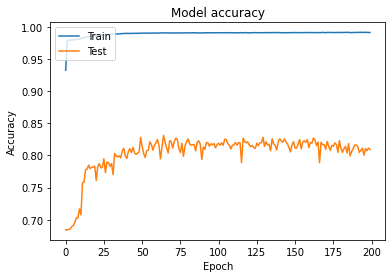

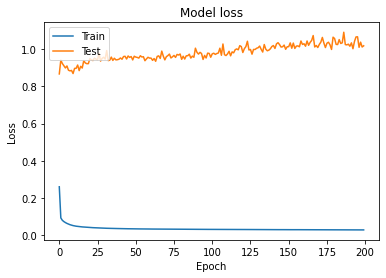

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_pred = blend.predict_classes(test)
y_BM=blend.predict_proba(test)
acc1 = accuracy_score(y_test, y_pred)
f1_score_1 = metrics.f1_score(y_test, y_pred)
roc_1 = metrics.roc_auc_score(y_test, y_BM)
print([acc1,f1_score_1,roc_1])
print(confusion_matrix(y_test, y_pred))
blend.save('blend.h5')

[0.8241768946035457, 0.6373317259393207, 0.7782751689493856]
[[6875  947]
 [ 858 1586]]
